In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import pycountry
import warnings


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost

warnings.filterwarnings("ignore")
import os

### Getting Know the Data

In [2]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Apparently there is not any null values.
# Still, it's worth checking.

In [6]:
df.isnull().sum()*100/len(df)

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [8]:
for i in df.columns:
    print("Number of unique values on ",i,":", df[i].nunique())

Number of unique values on  Age : 43
Number of unique values on  Attrition : 2
Number of unique values on  BusinessTravel : 3
Number of unique values on  DailyRate : 886
Number of unique values on  Department : 3
Number of unique values on  DistanceFromHome : 29
Number of unique values on  Education : 5
Number of unique values on  EducationField : 6
Number of unique values on  EmployeeCount : 1
Number of unique values on  EmployeeNumber : 1470
Number of unique values on  EnvironmentSatisfaction : 4
Number of unique values on  Gender : 2
Number of unique values on  HourlyRate : 71
Number of unique values on  JobInvolvement : 4
Number of unique values on  JobLevel : 5
Number of unique values on  JobRole : 9
Number of unique values on  JobSatisfaction : 4
Number of unique values on  MaritalStatus : 3
Number of unique values on  MonthlyIncome : 1349
Number of unique values on  MonthlyRate : 1427
Number of unique values on  NumCompaniesWorked : 10
Number of unique values on  Over18 : 1
Numb

In [9]:
# Over18, EmployeeCount, StandardHours columns have only 1 unique value.
# That means that these columns will have no effect on our model.

In [10]:
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", 
        "StandardHours"], axis=1, inplace=True)

In [11]:
#Dividing the data into two groups, numerical and categorical, to facilitate analysis
numerical = []
categorical = []

for i in df.columns:
    if df[i].dtypes != object:
        numerical.append(i)
    else:
        categorical.append(i)

In [12]:
df_categorical=df[categorical]
df_numerical=df[numerical]

### Data Visualization

<AxesSubplot:xlabel='Attrition', ylabel='count'>

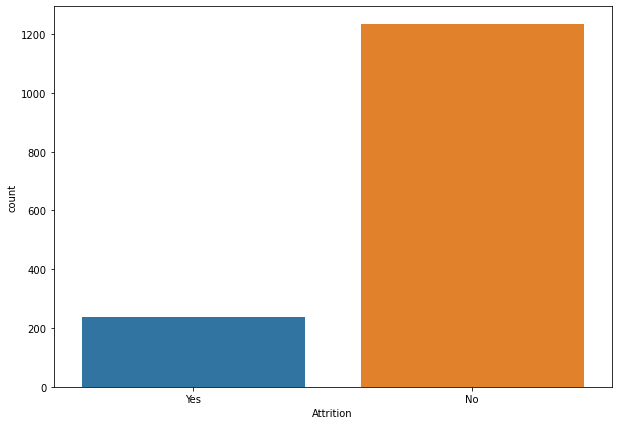

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(df["Attrition"])

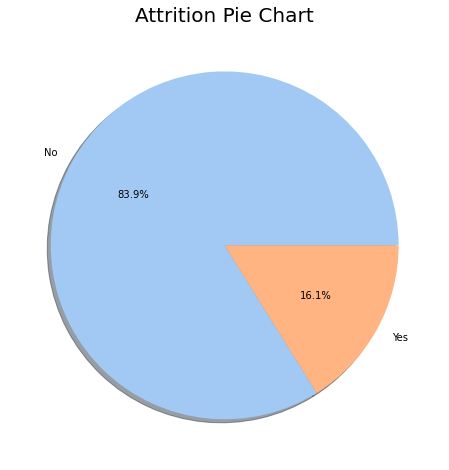

In [14]:
plt.figure(figsize=(8,8))
sns.set_palette("pastel")
plt.pie(df["Attrition"].value_counts().values,
       labels=df["Attrition"].value_counts().index,
       autopct="%1.1f%%",
       shadow=True)
plt.title("Attrition Pie Chart", color="Black", fontsize=20)
plt.show()

In [15]:
# As we can see, there is a serious unbalance in target value.
# This will be a serious problem for our model but for now I will not fix it.
# Because I want to see how it affects the results.

<Figure size 720x504 with 0 Axes>

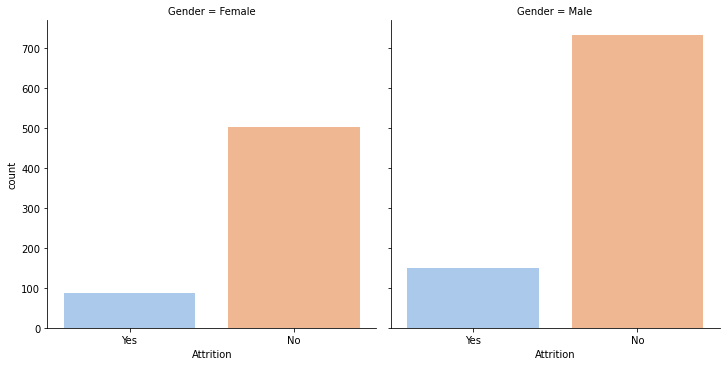

In [16]:
plt.figure(figsize=(10,7))
sns.catplot(x="Attrition",  col="Gender",
                data=df, kind="count");

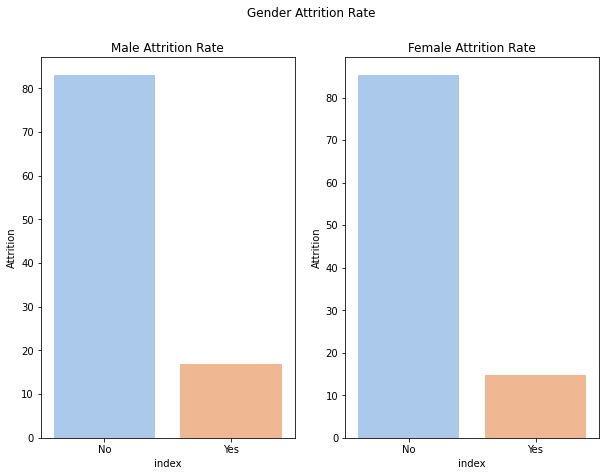

In [18]:
male=df[df["Gender"]=="Male"]
male_percentage=male.Attrition.value_counts()*100/len(male)
male_percentage=pd.DataFrame(male_percentage, index=None)
male_percentage=male_percentage.reset_index()

female=df[df["Gender"]=="Female"]
female_percentage=female.Attrition.value_counts()*100/len(female)
female_percentage=pd.DataFrame(female_percentage, index=None)
female_percentage=female_percentage.reset_index()

fig, axes = plt.subplots(1, 2, figsize=(10,7))
fig.suptitle("Gender Attrition Rate")

sns.barplot(ax=axes[0], x=male_percentage["index"],
           y=male_percentage["Attrition"])
axes[0].set_title("Male Attrition Rate")

sns.barplot(ax=axes[1], x=female_percentage["index"],
           y=female_percentage["Attrition"])
axes[1].set_title("Female Attrition Rate")

plt.show();

In [19]:
# According to these graphs, we can easily say that Gender has low correlation with Attrition.

In [20]:
#Let's see the columns we need to check with distplot
for i in df_numerical.columns:
    print("Number of unique values of", i, "is", df[i].nunique())

Number of unique values of Age is 43
Number of unique values of DailyRate is 886
Number of unique values of DistanceFromHome is 29
Number of unique values of Education is 5
Number of unique values of EnvironmentSatisfaction is 4
Number of unique values of HourlyRate is 71
Number of unique values of JobInvolvement is 4
Number of unique values of JobLevel is 5
Number of unique values of JobSatisfaction is 4
Number of unique values of MonthlyIncome is 1349
Number of unique values of MonthlyRate is 1427
Number of unique values of NumCompaniesWorked is 10
Number of unique values of PercentSalaryHike is 15
Number of unique values of PerformanceRating is 2
Number of unique values of RelationshipSatisfaction is 4
Number of unique values of StockOptionLevel is 4
Number of unique values of TotalWorkingYears is 40
Number of unique values of TrainingTimesLastYear is 7
Number of unique values of WorkLifeBalance is 4
Number of unique values of YearsAtCompany is 37
Number of unique values of YearsInC

In [21]:
distplot_columns=["Age", "DailyRate", "MonthlyIncome",
                   "MonthlyRate"]
distplot_data=df[distplot_columns]

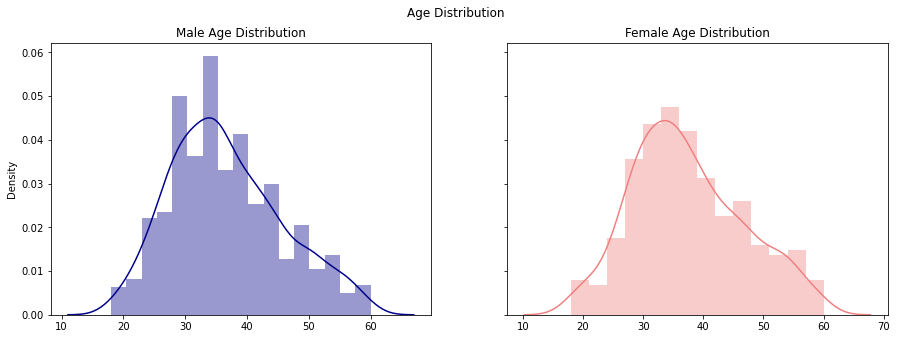

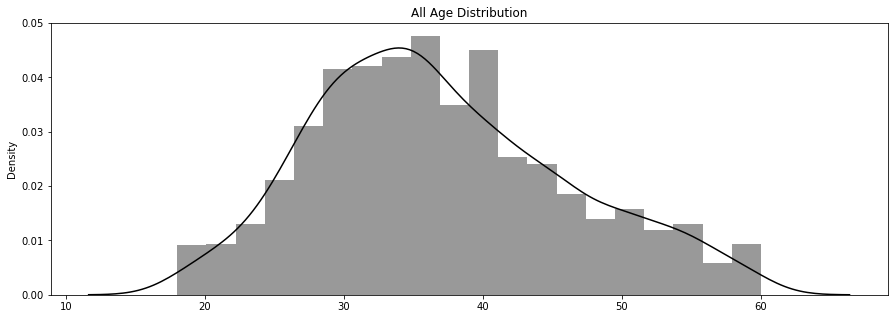

In [22]:
fig, axes= plt.subplots(1, 2, figsize=(15,5), sharey=True)
fig.suptitle("Age Distribution")

sns.distplot(ax=axes[0], x=male["Age"], color="darkblue")
axes[0].set_title("Male Age Distribution")
sns.distplot(ax=axes[1], x=female["Age"], color="lightcoral")
axes[1].set_title("Female Age Distribution")
plt.show();

plt.figure(figsize=(15,5))
sns.distplot(x=df["Age"],
            color="black",
            bins=20).set(title="All Age Distribution")
plt.show()

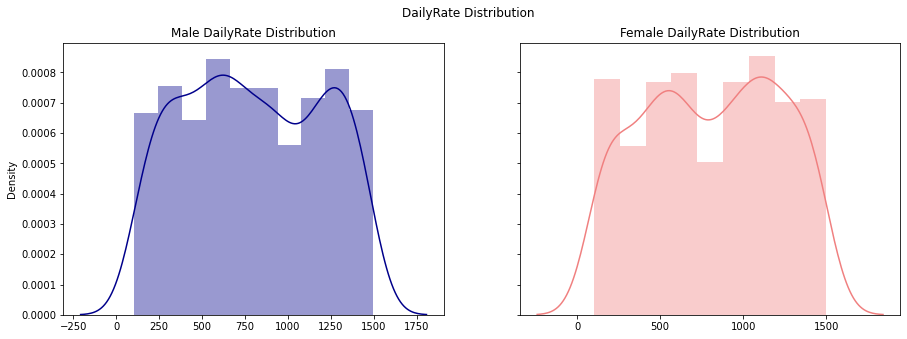

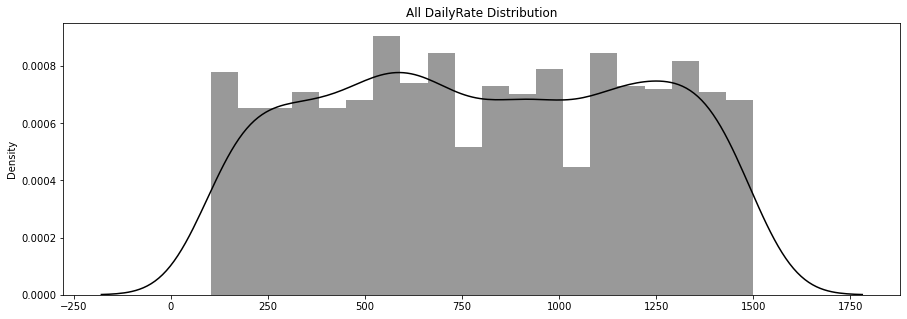

In [23]:
fig, axes= plt.subplots(1, 2, figsize=(15,5), sharey=True)
fig.suptitle("DailyRate Distribution")

sns.distplot(ax=axes[0], x=male["DailyRate"], color="darkblue")
axes[0].set_title("Male DailyRate Distribution")
sns.distplot(ax=axes[1], x=female["DailyRate"], color="lightcoral")
axes[1].set_title("Female DailyRate Distribution")
plt.show();

plt.figure(figsize=(15,5))
sns.distplot(x=df["DailyRate"],
            color="black",
            bins=20).set(title="All DailyRate Distribution")
plt.show()

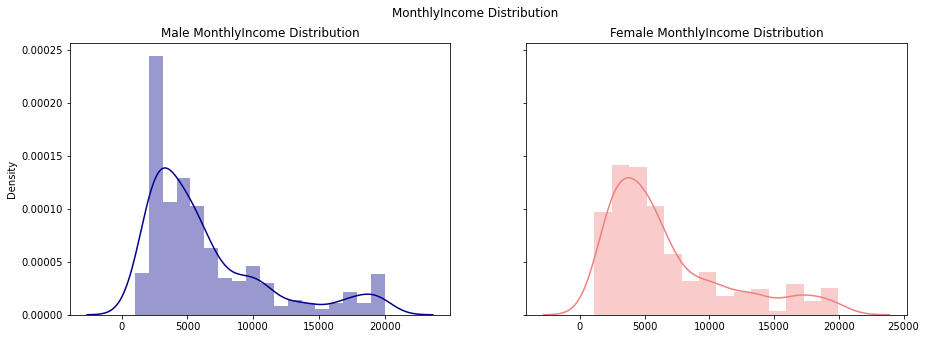

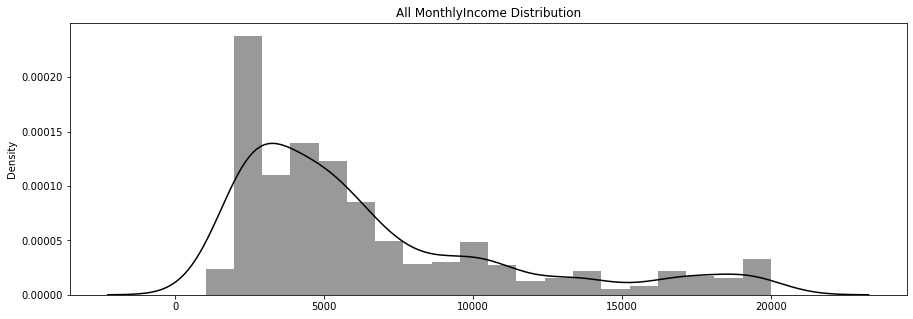

In [24]:
fig, axes= plt.subplots(1, 2, figsize=(15,5), sharey=True)
fig.suptitle("MonthlyIncome Distribution")

sns.distplot(ax=axes[0], x=male["MonthlyIncome"], color="darkblue")
axes[0].set_title("Male MonthlyIncome Distribution")
sns.distplot(ax=axes[1], x=female["MonthlyIncome"], color="lightcoral")
axes[1].set_title("Female MonthlyIncome Distribution")
plt.show();

plt.figure(figsize=(15,5))
sns.distplot(x=df["MonthlyIncome"],
            color="black",
            bins=20).set(title="All MonthlyIncome Distribution")
plt.show()

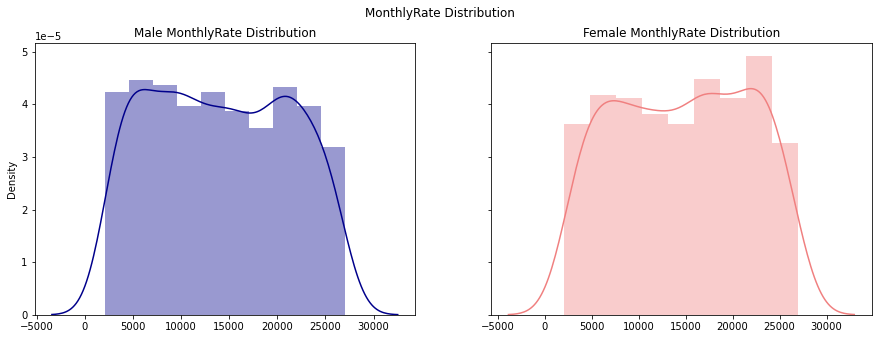

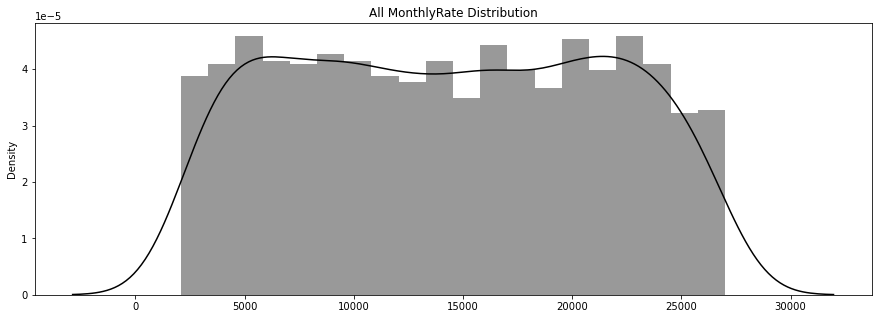

In [25]:
fig, axes= plt.subplots(1, 2, figsize=(15,5), sharey=True)
fig.suptitle("MonthlyRate Distribution")

sns.distplot(ax=axes[0], x=male["MonthlyRate"], color="darkblue")
axes[0].set_title("Male MonthlyRate Distribution")
sns.distplot(ax=axes[1], x=female["MonthlyRate"], color="lightcoral")
axes[1].set_title("Female MonthlyRate Distribution")
plt.show();

plt.figure(figsize=(15,5))
sns.distplot(x=df["MonthlyRate"],
            color="black",
            bins=20).set(title="All MonthlyRate Distribution")
plt.show()

The reason I checked the distplot plots with gender was because I thought gender discrimination was a strong reason to leave the job. However, according to the graphics, there is no gender discrimination. This shows why the correlation between gender and atrittion is low.

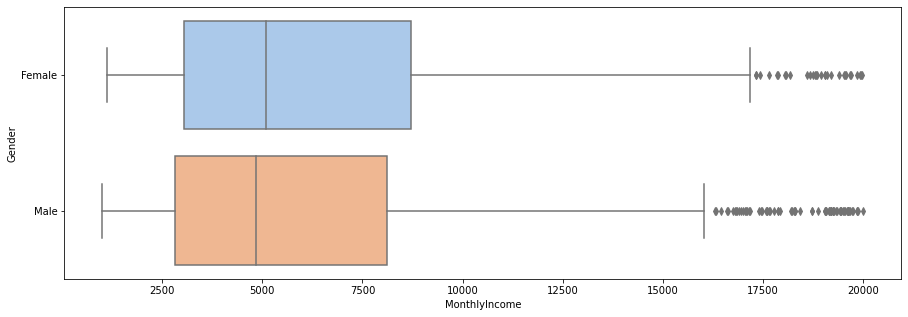

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(x="MonthlyIncome",y="Gender",  data=df)
plt.show()

Let's examine other columns that may be related to attrition.

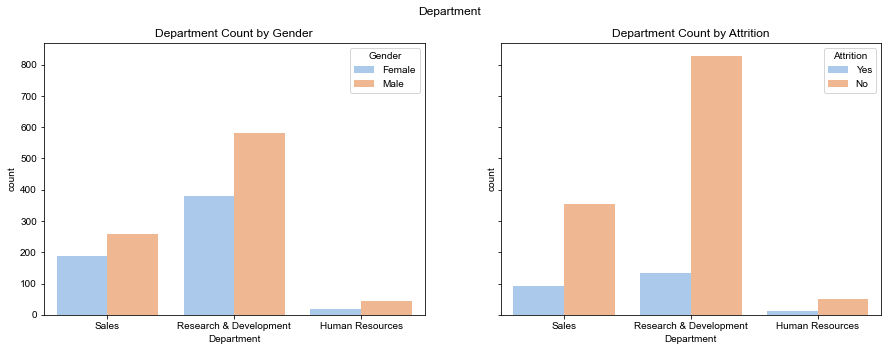

In [27]:
# Department
fig, axes= plt.subplots(1, 2, figsize=(15,5), sharey=True)
fig.suptitle("Department")

sns.countplot(ax=axes[0], x=df["Department"], hue=df["Gender"])
axes[0].set_title("Department Count by Gender")
sns.countplot(ax=axes[1], x=df["Department"], hue=df["Attrition"])
axes[1].set_title("Department Count by Attrition")
sns.set_style("darkgrid")
fig.show();

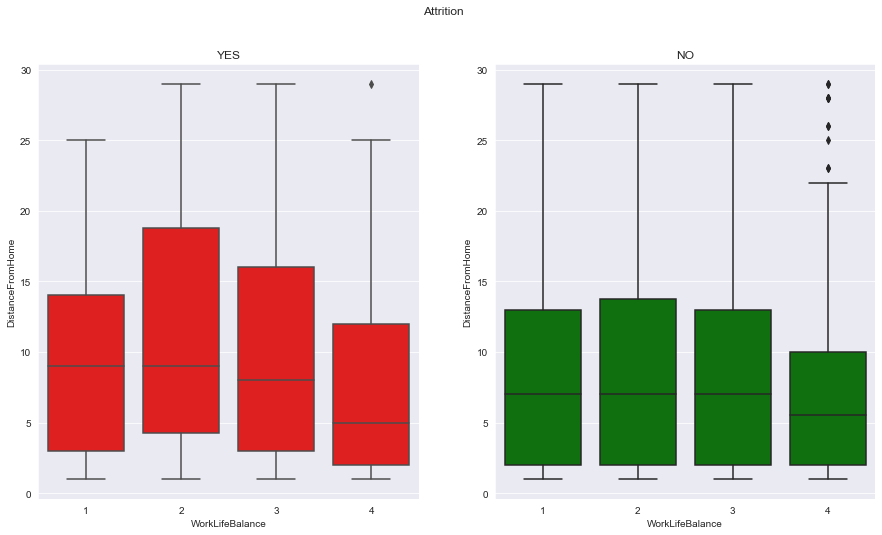

In [28]:
# WorkLifeBalance
fig, axes= plt.subplots(1, 2, figsize=(15,8))
fig.suptitle("Attrition")

df_yes=df[df["Attrition"]=="Yes"]
df_no=df[df["Attrition"]=="No"]
sns.boxplot(data=df_yes, x="WorkLifeBalance",
                y="DistanceFromHome", color="r",
               ax=axes[0])
axes[0].set_title("YES")
sns.boxplot(data=df_no, x="WorkLifeBalance",
                y="DistanceFromHome", color="g",
               ax=axes[1])
axes[1].set_title("NO")
plt.show();

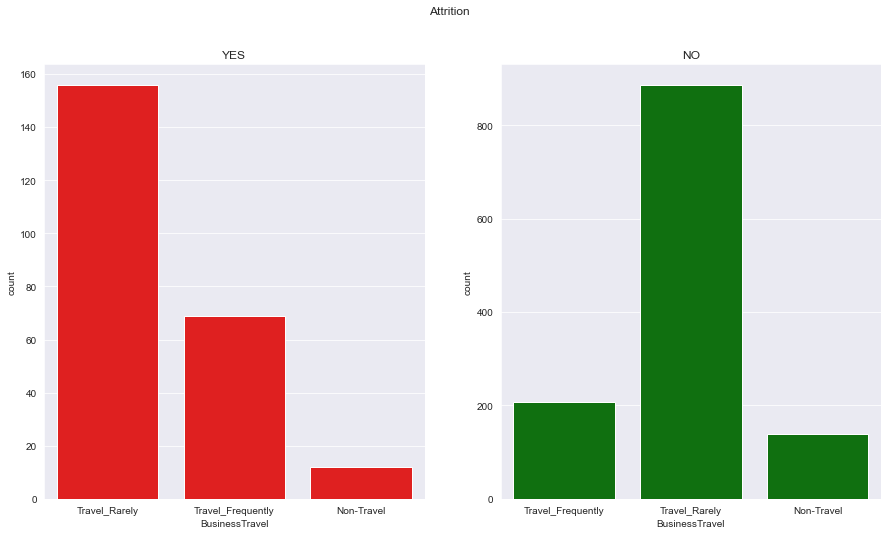

In [29]:
#BusinessTravel
fig, axes= plt.subplots(1, 2, figsize=(15,8))
fig.suptitle("Attrition")

df_yes=df[df["Attrition"]=="Yes"]
df_no=df[df["Attrition"]=="No"]
sns.countplot(data=df_yes, x="BusinessTravel", color="r",
               ax=axes[0])
axes[0].set_title("YES")
sns.countplot(data=df_no, x="BusinessTravel", color="g",
               ax=axes[1])
axes[1].set_title("NO")
plt.show();

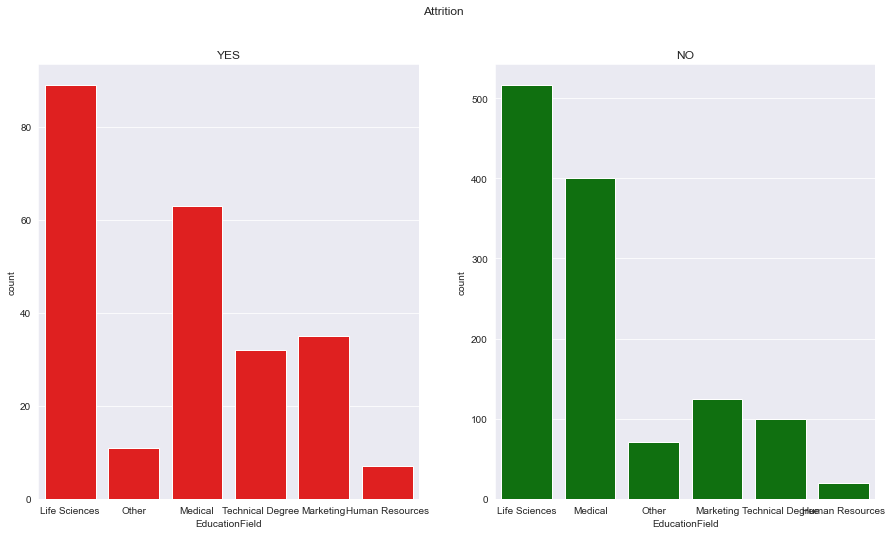

In [30]:
#EducationField
fig, axes= plt.subplots(1, 2, figsize=(15,8))
fig.suptitle("Attrition")

sns.countplot(data=df_yes, x="EducationField", color="r",
               ax=axes[0])
axes[0].set_title("YES")
sns.countplot(data=df_no, x="EducationField", color="g",
               ax=axes[1])
axes[1].set_title("NO")
plt.show()

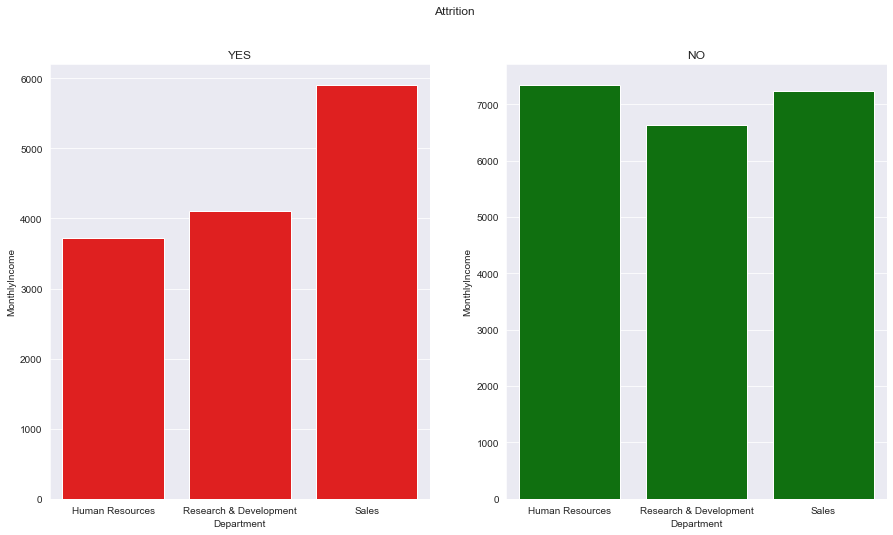

In [31]:
# Average Income by Department
df_departments_income_yes=df_yes.groupby("Department")["MonthlyIncome"].mean().reset_index()
df_departments_income_no=df_no.groupby("Department")["MonthlyIncome"].mean().reset_index()

fig, axes= plt.subplots(1, 2, figsize=(15,8))
fig.suptitle("Attrition")

sns.barplot(data=df_departments_income_yes, x="Department", 
            y="MonthlyIncome",
            color="r",
               ax=axes[0])
axes[0].set_title("YES")
sns.barplot(data=df_departments_income_no, x="Department",
            y="MonthlyIncome",
            color="g",
               ax=axes[1])
axes[1].set_title("NO")

plt.show()

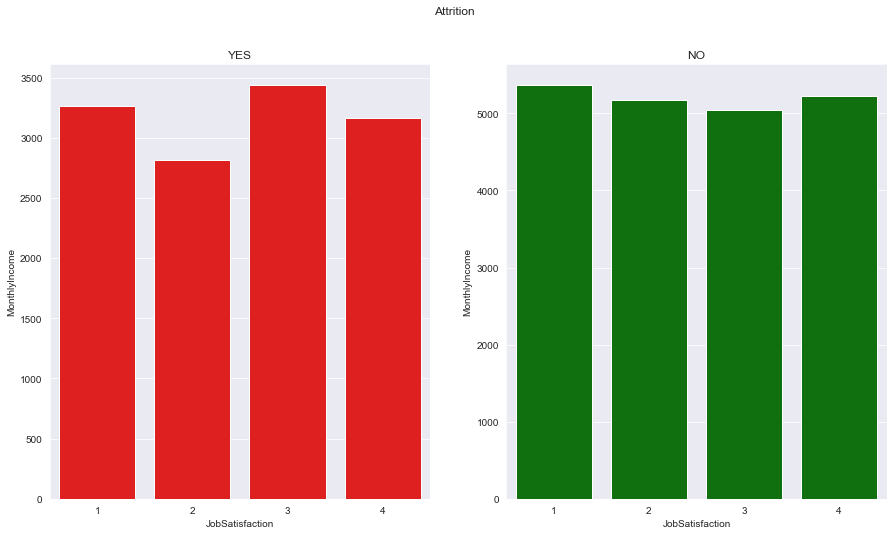

In [32]:
#Is JobSatisfaction a reason for employees to leave?
df_satisfaction_income_yes=df_yes.groupby("JobSatisfaction")["MonthlyIncome"].median().reset_index()
df_satisfaction_income_no=df_no.groupby("JobSatisfaction")["MonthlyIncome"].median().reset_index()

fig, axes= plt.subplots(1, 2, figsize=(15,8))
fig.suptitle("Attrition")

sns.barplot(data=df_satisfaction_income_yes, x="JobSatisfaction", 
            y="MonthlyIncome",
            color="r",
               ax=axes[0])
axes[0].set_title("YES")
sns.barplot(data=df_satisfaction_income_no, x="JobSatisfaction",
            y="MonthlyIncome",
            color="g",
               ax=axes[1])
axes[1].set_title("NO")
plt.show()

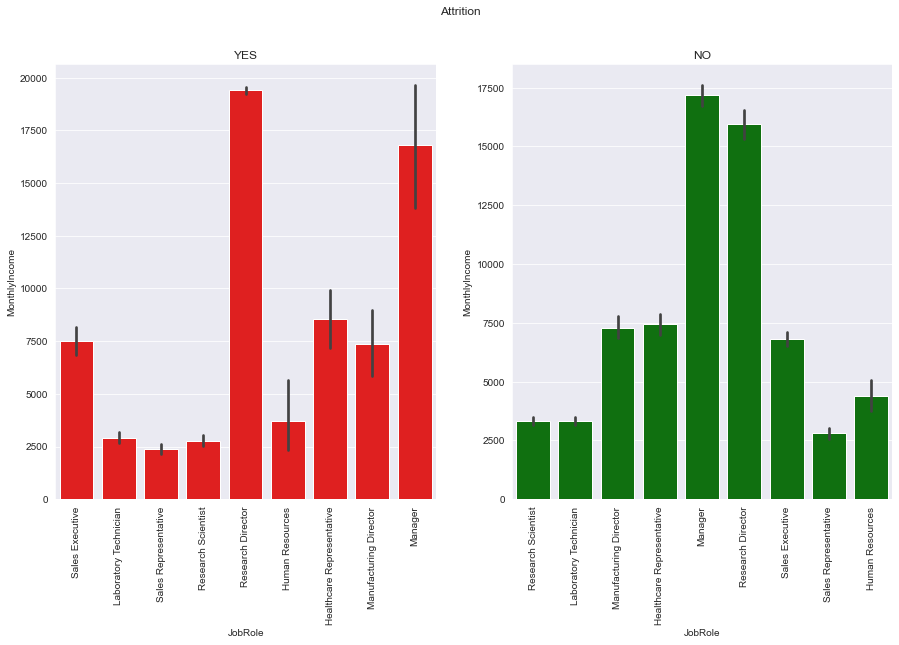

In [33]:
# Job roles and attrition
fig, axes= plt.subplots(1, 2, figsize=(15,8))
fig.suptitle("Attrition")


a=sns.barplot(data=df_yes, x="JobRole", 
            y="MonthlyIncome",
            color="r",
               ax=axes[0])
a.set_xticklabels(a.get_xticklabels(),rotation = 90)
plt.xticks(rotation=90)
axes[0].set_title("YES")
sns.barplot(data=df_no, x="JobRole",
            y="MonthlyIncome",
            color="g",
               ax=axes[1])
axes[1].set_title("NO")
fig.show();

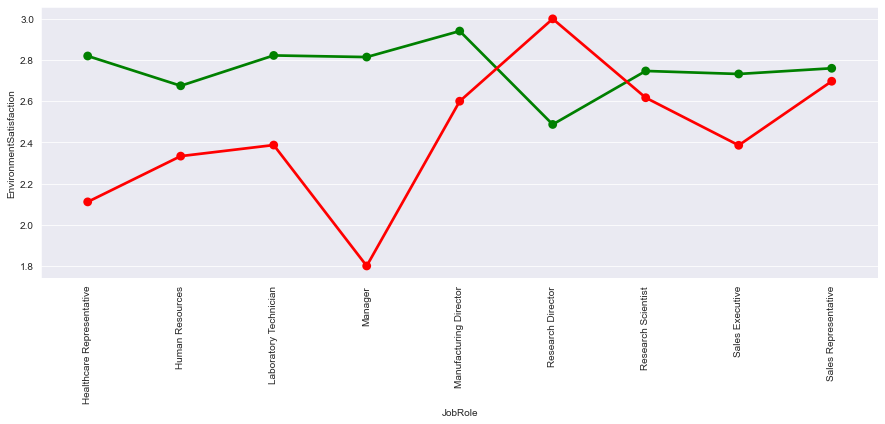

In [34]:
df_environment_yes=df_yes.groupby("JobRole")["EnvironmentSatisfaction"].mean().reset_index()
df_environment_no=df_no.groupby("JobRole")["EnvironmentSatisfaction"].mean().reset_index()


plt.figure(figsize=(15,5))
ax=sns.pointplot(x=df_environment_no["JobRole"],
                y=df_environment_no["EnvironmentSatisfaction"],
                color="g")

ax=sns.pointplot(x=df_environment_yes["JobRole"],
                y=df_environment_yes["EnvironmentSatisfaction"],
                color="r")
plt.xticks(rotation=90)
plt.show()

Surprisingly, satisfaction and attrition are inversely proportional to Research directors.

In [35]:
#Correlation Map
le=LabelEncoder()
df["BusinessTravel"]=le.fit_transform(df["BusinessTravel"])
df["Department"]=le.fit_transform(df["Department"])
df["EducationField"]=le.fit_transform(df["EducationField"])
df["Gender"]=le.fit_transform(df["Gender"])
df["JobRole"]=le.fit_transform(df["JobRole"])
df["MaritalStatus"]=le.fit_transform(df["MaritalStatus"])
df["OverTime"]=le.fit_transform(df["OverTime"])
df["Attrition"]=le.fit_transform(df["Attrition"])
correlation=df.corr()["Attrition"].reset_index().sort_values("Attrition",
                                                            ascending=False)

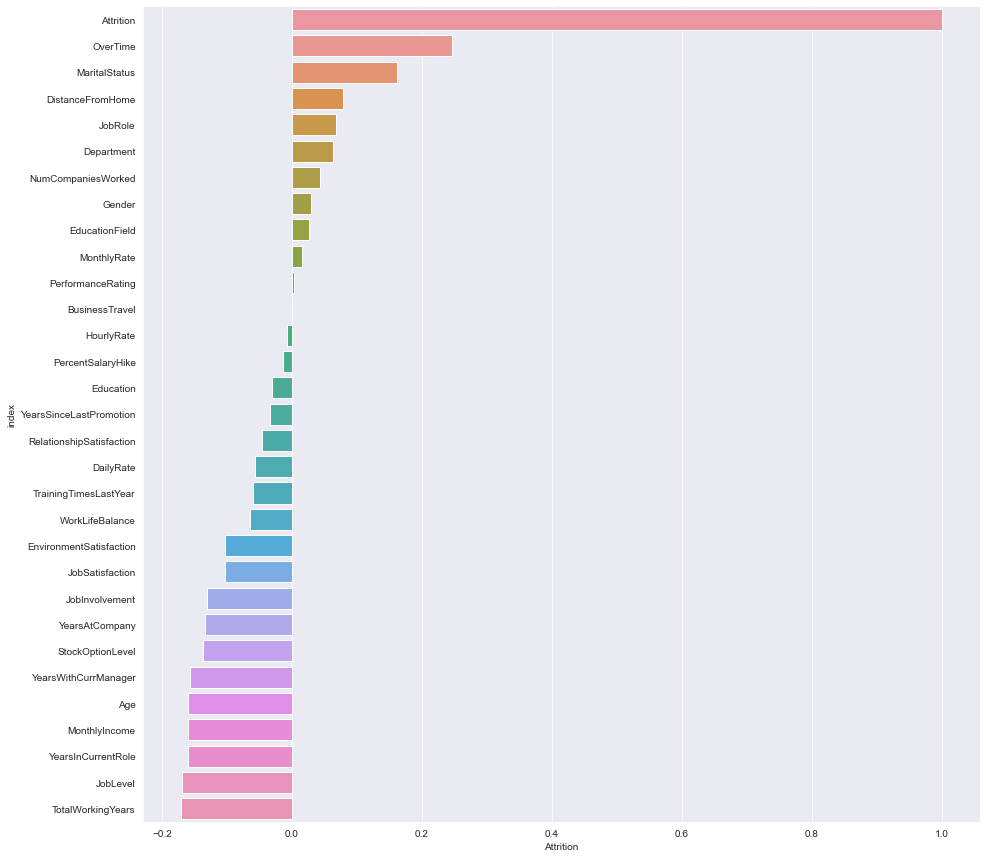

In [36]:
plt.figure(figsize=(15,15))

sns.barplot(x="Attrition", y="index", data=correlation)
plt.show()

### Data Processing

In [37]:
# Getting dummy values
dummy=[column for column in df.drop("Attrition", axis=1).columns if df[column].nunique() < 10]
data=pd.get_dummies(df, columns=dummy, drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         1470 non-null   int64
 1   Attrition                   1470 non-null   int32
 2   DailyRate                   1470 non-null   int64
 3   DistanceFromHome            1470 non-null   int64
 4   HourlyRate                  1470 non-null   int64
 5   MonthlyIncome               1470 non-null   int64
 6   MonthlyRate                 1470 non-null   int64
 7   NumCompaniesWorked          1470 non-null   int64
 8   PercentSalaryHike           1470 non-null   int64
 9   TotalWorkingYears           1470 non-null   int64
 10  YearsAtCompany              1470 non-null   int64
 11  YearsInCurrentRole          1470 non-null   int64
 12  YearsSinceLastPromotion     1470 non-null   int64
 13  YearsWithCurrManager        1470 non-null   int64
 14  Business

In [38]:
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,...,StockOptionLevel_3,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1,1102,1,94,5993,19479,8,11,8,...,0,0,0,0,0,0,0,0,0,0
1,49,0,279,8,61,5130,24907,1,23,10,...,0,0,0,1,0,0,0,0,1,0
2,37,1,1373,2,92,2090,2396,6,15,7,...,0,0,0,1,0,0,0,0,1,0
3,33,0,1392,3,56,2909,23159,1,11,8,...,0,0,0,1,0,0,0,0,1,0
4,27,0,591,2,40,3468,16632,9,12,6,...,0,0,0,1,0,0,0,0,1,0


In [39]:
data.shape

(1470, 68)

In [40]:
y=data["Attrition"]
x=data.drop("Attrition", axis=1)

### Cross Validation with Unbalanced Data 

In [41]:
# I will split 5 different folds with cross valdiation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1

for train_index, test_index in kf.split(x,y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 1176, Test set:294
Fold:2, Train set: 1176, Test set:294
Fold:3, Train set: 1176, Test set:294
Fold:4, Train set: 1176, Test set:294
Fold:5, Train set: 1176, Test set:294


##### Logistic Regression

In [42]:
score = cross_val_score(linear_model.LogisticRegression(random_state = 42),
                       x, y, cv=kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.84013605 0.83673469 0.84693878 0.84013605 0.84353741]
Average score: 0.84


##### Decision Tree

In [43]:
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.80952381 0.73129252 0.78911565 0.78911565 0.72108844]
Average score: 0.77


##### Random Forest

In [44]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.84693878 0.85034014 0.86734694 0.85714286 0.8537415 ]
Average score: 0.86


##### XGBoost

In [45]:
score = cross_val_score(xgboost.XGBClassifier(random_state= 42), x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.84353741 0.84353741 0.87755102 0.87414966 0.87414966]
Average score: 0.86


### Balancing The Target

Attrition_0: (1233, 68)
Attrition_1: (237, 68)
total class of 1 and 0: 0    1233
1    1233
Name: Attrition, dtype: int64


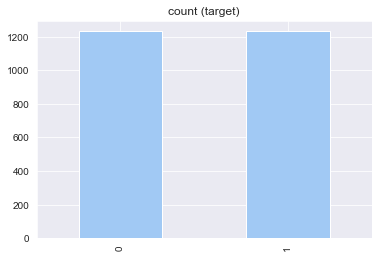

In [46]:
attrition_count_0, attrition_count_1 = data["Attrition"].value_counts()

#seperate
attrition_0 = data[data["Attrition"] == 0]
attrition_1 = data[data["Attrition"] == 1]

print("Attrition_0:", attrition_0.shape)
print("Attrition_1:", attrition_1.shape)

#Over sampling
attrition_1_over = attrition_1.sample(attrition_count_0, replace=True)

test_over = pd.concat([attrition_1_over, attrition_0], axis=0)

print("total class of 1 and 0:",test_over['Attrition'].value_counts())
print("==============================")
test_over['Attrition'].value_counts().plot(kind='bar', title='count (target)')
plt.show()

In [47]:
print(test_over.shape)
print(data.shape)

(2466, 68)
(1470, 68)


In [48]:
y=test_over["Attrition"]
x=test_over.drop("Attrition", axis=1)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1

for train_index, test_index in kf.split(x,y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 1972, Test set:494
Fold:2, Train set: 1973, Test set:493
Fold:3, Train set: 1973, Test set:493
Fold:4, Train set: 1973, Test set:493
Fold:5, Train set: 1973, Test set:493


##### Logistic Regression

In [49]:
score = cross_val_score(linear_model.LogisticRegression(random_state = 42),
                       x, y, cv=kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.66396761 0.64705882 0.65517241 0.61866126 0.64705882]
Average score: 0.65


##### Decision Tree

In [50]:
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.92105263 0.92089249 0.92697769 0.92292089 0.9188641 ]
Average score: 0.92


##### Random Forest

In [51]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.98785425 0.99188641 0.98782961 0.97565923 0.97971602]
Average score: 0.98


##### XGBoost

In [52]:
score = cross_val_score(xgboost.XGBClassifier(random_state= 42), x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.97368421 0.96957404 0.96146045 0.96754564 0.95537525]
Average score: 0.97


In [53]:
cross_val_results_data=[["Logistic Regression", 84, 68],
             ["Decision Tree", 77, 93],
             ["Random Forest", 86, 98],
             ["XGB", 86, 96]]

cross_val_results_data=pd.DataFrame(cross_val_results_data, columns=["Classifier",
                                                "Unbalanced",
                                                "Balanced"])

In [54]:
cross_val_results_data

,Classifier,Unbalanced,Balanced
0,Logistic Regression,84,68
1,Decision Tree,77,93
2,Random Forest,86,98
3,XGB,86,96


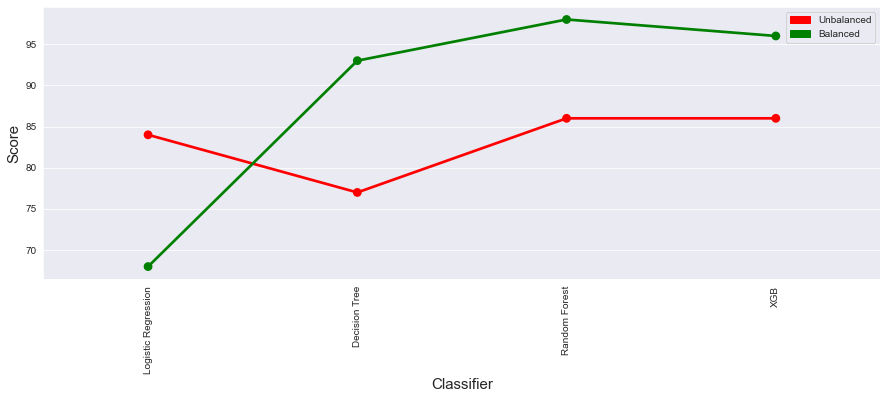

In [55]:
plt.figure(figsize=(15,5))
ax=sns.pointplot(x=cross_val_results_data["Classifier"],
                y=cross_val_results_data["Unbalanced"],
                color="r")

ax=sns.pointplot(x=cross_val_results_data["Classifier"],
                y=cross_val_results_data["Balanced"],
                color="g")
ax.set_ylabel("Score", fontsize=15)
ax.set_xlabel("Classifier", fontsize=15)


import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='r', label='Unbalanced')
black_patch = mpatches.Patch(color='g', label='Balanced')
plt.legend(handles=[red_patch, black_patch])

plt.xticks(rotation=90)
plt.show()